In [1]:
from data import dataset_loader
from utils import show_images
from models import model
from training import model_train
from utils import validate
%matplotlib inline

In [2]:
classes, train_loader, test_loader = dataset_loader.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape: torch.Size([128, 3, 32, 32])


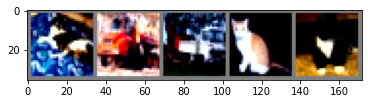

In [3]:
show_images.show_random_images(train_loader, classes)

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = model.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,304
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
           Dropout-7           [-1, 16, 32, 32]               0
         MaxPool2d-8           [-1, 16, 16, 16]               0
            Conv2d-9           [-1, 32, 16, 16]           4,608
      BatchNorm2d-10           [-1, 32, 16, 16]              64
             ReLU-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           9,216
      BatchNorm2d-13           [-1, 32, 16, 16]              64
             ReLU-14           [-1

In [6]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR


EPOCHS = 2
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.5, weight_decay=0.001)
scheduler = OneCycleLR(optimizer, max_lr=0.5, steps_per_epoch=len(train_loader), epochs=EPOCHS)

In [7]:
train_losses = []
test_losses = []
train_acc = []
test_accs = []
misclassified_imgs = []

for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    model_train.train(model, device, train_loader, criterion, optimizer, epoch)
    test_loss, test_accs, misclassified_imgs = model_train.test(model, device, test_loader, criterion, classes, test_losses, test_accs, misclassified_imgs, epoch)
    scheduler.step(test_loss)

  0%|                                                                                          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.1889253854751587 Batch_id=390 Accuracy=50.09: 100%|███████████████████████████| 391/391 [00:56<00:00,  6.98it/s]
C:\Anaconda3\envs\eva5\lib\site-packages\torch\optim\lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
  0%|                                                                                          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0095, Accuracy: 5531/10000 (55.31%)

EPOCH: 2


Loss=0.8812505006790161 Batch_id=390 Accuracy=66.42: 100%|███████████████████████████| 391/391 [00:54<00:00,  7.15it/s]


Test set: Average loss: 0.0077, Accuracy: 6633/10000 (66.33%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog plane  bird  ship
Predicted:    dog plane plane truck


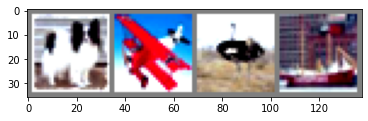

In [8]:
validate.compare_predicted_actual(model, device, test_loader, classes)

In [9]:
validate.accuracy(model, device, test_loader)

Accuracy of the network on the 10000 test images: 66 %


In [10]:
validate.classwise(model, device, classes, test_loader)

Accuracy of plane : 71 %
Accuracy of   car : 85 %
Accuracy of  bird : 50 %
Accuracy of   cat : 27 %
Accuracy of  deer : 68 %
Accuracy of   dog : 61 %
Accuracy of  frog : 65 %
Accuracy of horse : 37 %
Accuracy of  ship : 75 %
Accuracy of truck : 75 %
